In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def prepare_plot(xticks, yticks, figsize=(10.5, 6), hide_labels=False, grid_color='#999999',
                 grid_width=1.0):
    """Template for generating the plot layout."""
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hide_labels: axis.set_ticklabels([])
    plt.grid(color=grid_color, linewidth=grid_width, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

def create_2D_gaussian(mn, variance, cov, n):
    """Randomly sample points from a two-dimensional Gaussian distribution"""
    np.random.seed(142)
    return np.random.multivariate_normal(np.array([mn, mn]), np.array([[variance, cov], [cov, variance]]), n)

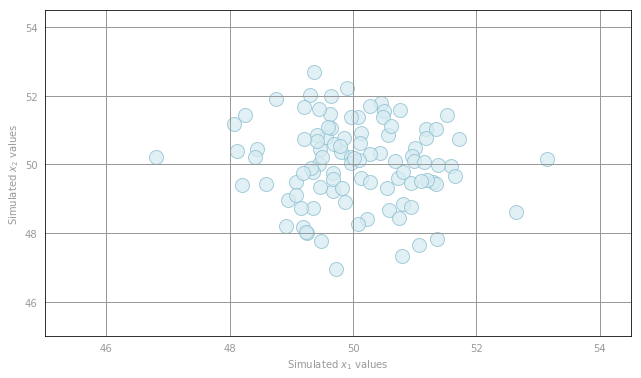

In [3]:
data_random = create_2D_gaussian(mn=50, variance=1, cov=0, n=100)

# generate layout and plot data
fig, ax = prepare_plot(np.arange(46, 55, 2), np.arange(46, 55, 2))
ax.set_xlabel(r'Simulated $x_1$ values'), ax.set_ylabel(r'Simulated $x_2$ values')
ax.set_xlim(45, 54.5), ax.set_ylim(45, 54.5)
plt.scatter(data_random[:,0], data_random[:,1], s=14**2, c='#d6ebf2', edgecolors='#8cbfd0', alpha=0.75)
display(fig)

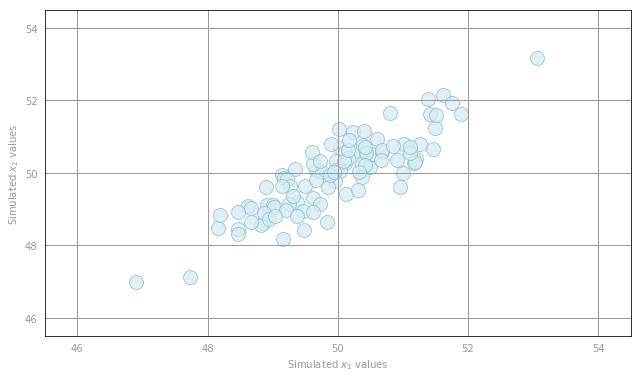

In [4]:
data_correlated = create_2D_gaussian(mn=50, variance=1, cov=.9, n=100)

# generate layout and plot data
fig, ax = prepare_plot(np.arange(46, 55, 2), np.arange(46, 55, 2))
ax.set_xlabel(r'Simulated $x_1$ values'), ax.set_ylabel(r'Simulated $x_2$ values')
ax.set_xlim(45.5, 54.5), ax.set_ylim(45.5, 54.5)
plt.scatter(data_correlated[:,0], data_correlated[:,1], s=14**2, c='#d6ebf2',
            edgecolors='#8cbfd0', alpha=0.75)
display(fig)

In [5]:
data_correlated

array([[ 49.6717712 ,  50.07531969],
       [ 48.91414578,  49.12518152],
       [ 50.37668368,  50.25922294],
       [ 50.02888047,  50.69019359],
       [ 48.85103171,  48.61600922],
       [ 50.42149067,  50.62473957],
       [ 50.49686058,  50.15380993],
       [ 49.01004188,  49.12506689],
       [ 50.79771022,  51.64471866],
       [ 49.50501291,  49.64699606],
       [ 49.15177411,  49.95217026],
       [ 47.72954702,  47.11510243],
       [ 49.34624543,  50.10730416],
       [ 49.16840303,  49.8625362 ],
       [ 49.62438957,  49.31969   ],
       [ 50.2537844 ,  50.60757591],
       [ 49.97552227,  50.32143778],
       [ 50.11533296,  50.58463085],
       [ 53.06802266,  53.15829882],
       [ 51.19615409,  50.37409659],
       [ 51.50116317,  51.24797406],
       [ 49.0182636 ,  49.06097187],
       [ 51.41104007,  51.61344589],
       [ 48.82327847,  48.57233533],
       [ 51.17856732,  50.28395364],
       [ 49.48994589,  48.43698956],
       [ 50.11376815,  50.26881163],
 

In [6]:
data_correlated.shape

(100, 2)

In [7]:
data_correlated_zero_mean = data_correlated - np.mean(data_correlated, axis=0)

In [8]:
data_correlated_zero_mean 

array([[-0.28561917,  0.10351492],
       [-1.04324458, -0.84662325],
       [ 0.41929332,  0.28741817],
       [ 0.0714901 ,  0.71838882],
       [-1.10635865, -1.35579555],
       [ 0.4641003 ,  0.6529348 ],
       [ 0.53947022,  0.18200516],
       [-0.94734849, -0.84673788],
       [ 0.84031985,  1.67291389],
       [-0.45237746, -0.32480871],
       [-0.80561626, -0.01963451],
       [-2.22784335, -2.85670234],
       [-0.61114494,  0.13549939],
       [-0.78898734, -0.10926857],
       [-0.3330008 , -0.65211476],
       [ 0.29639404,  0.63577114],
       [ 0.01813191,  0.34963301],
       [ 0.15794259,  0.61282608],
       [ 3.11063229,  3.18649405],
       [ 1.23876373,  0.40229182],
       [ 1.5437728 ,  1.27616929],
       [-0.93912677, -0.9108329 ],
       [ 1.4536497 ,  1.64164112],
       [-1.13411189, -1.39946944],
       [ 1.22117696,  0.31214887],
       [-0.46744448, -1.53481521],
       [ 0.15637779,  0.29700686],
       [-0.73967086, -0.14320705],
       [ 0.17099305,

In [9]:
np.mean(data_correlated, axis=0)

array([ 49.95739037,  49.97180477])

In [15]:
correlated_cov = data_correlated_zero_mean.T.dot(data_correlated_zero_mean) /100

In [14]:
data_correlated_zero_mean.shape

(100, 2)

In [16]:
from numpy.linalg import eigh

In [17]:
eig_vals, eig_vecs = eigh(correlated_cov)

In [18]:
eig_vals

array([ 0.13820481,  1.94345403])

In [19]:
eig_vecs

array([[-0.72461254,  0.68915649],
       [ 0.68915649,  0.72461254]])

In [20]:
eig_vecs.dot(eig_vals)

array([ 1.23919903,  1.50349589])